# Импорт библиотек и функции

In [ ]:
!pip install -q shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.7 MB/s eta 0:00:00


In [ ]:
import os
import shap
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras

from sklearn.model_selection import train_test_split

# Загрузка набора данных

In [ ]:
# получение токена для загрузки набора данных с сайта kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dashkabugashka","key":"120cb24fa13253988e528a5054fa0b13"}'}

In [ ]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Dec 15 14:24 kaggle.json


In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d alexteboul/diabetes-health-indicators-dataset

  0% 0.00/6.03M [00:00<?, ?B/s]
100% 6.03M/6.03M [00:00<00:00, 124MB/s]


# Чтение и исследование данных

In [ ]:
# разархивирование данных
!unzip "/content/diabetes-health-indicators-dataset.zip" -d "/content/diabetes"

Archive:  /content/diabetes-health-indicators-dataset.zip
  inflating: /content/diabetes/diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes/diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: /content/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv  


In [ ]:
df = pd.read_csv('/content/diabetes/diabetes_binary_health_indicators_BRFSS2015.csv') # читаем данные в перменную df
df.head() # выводим первые 5 строк

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df = df.drop_duplicates()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy="majority")
undersampled_data, undersampled_target = undersampler.fit_resample(df.drop('Diabetes_binary', axis=1), df['Diabetes_binary'])

# Деление на выборки

In [ ]:
X = undersampled_data
y = undersampled_target

In [ ]:
# делим выборку на тренировочную и тестовую
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и тестовый в соотношениии 80/20 (train/test)
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и валидационный в соотношениии 80/20 (train/test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train[:5000], y_train[:5000], test_size = 0.2, random_state = 0) # делим набор данных на тренировочный и валидационный в соотношениии 80/20 (train/test)

# Загрузка модели

In [ ]:
model = keras.models.load_model('/content/binary_class_model.h5')

# Shap

In [ ]:
explainer = shap.TreeExplainer(model)

In [ ]:
shap_values = explainer.shap_values(X_test)

In [ ]:
expected_value = explainer.expected_value

In [ ]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: -0.028836634


## summary_plot

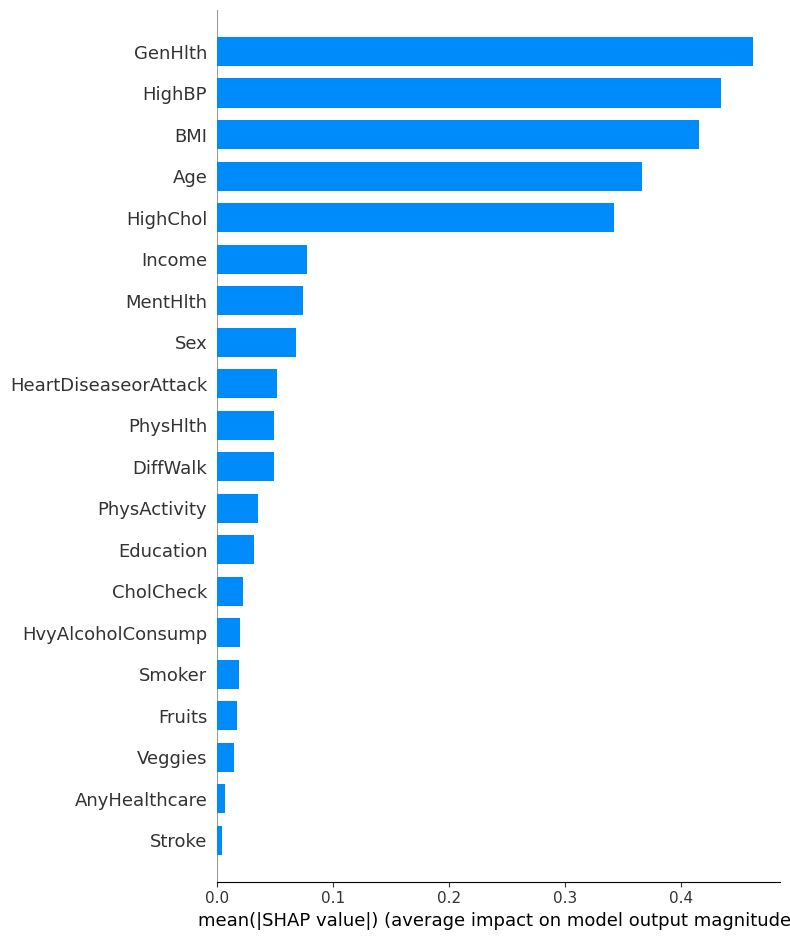

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

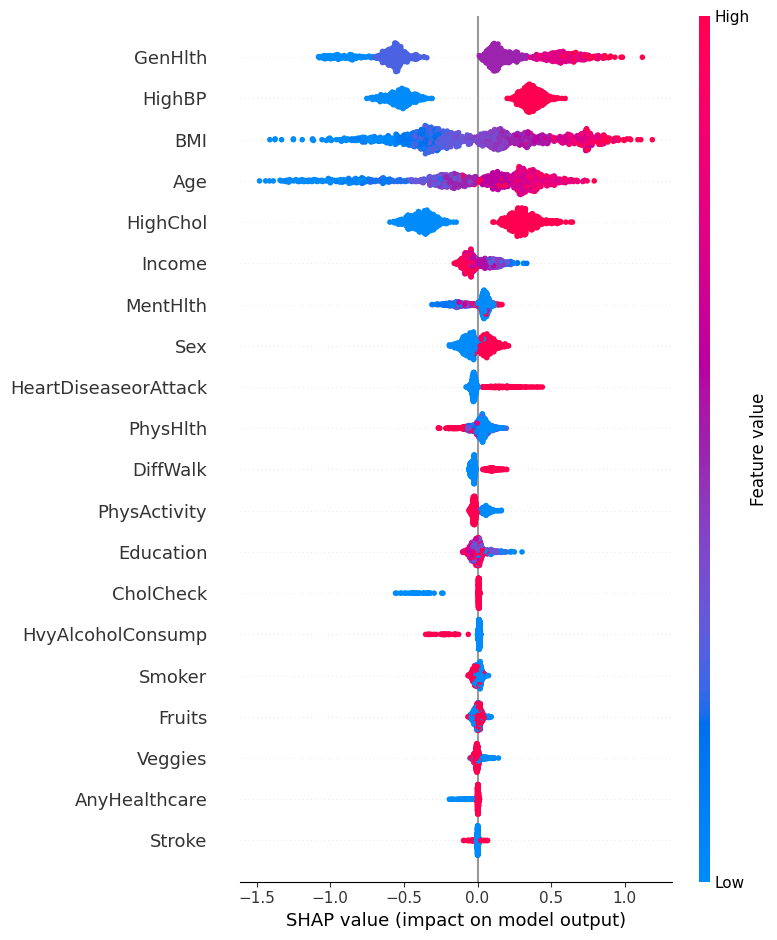

In [ ]:
shap.summary_plot(shap_values, X_test)

## dependence_plot

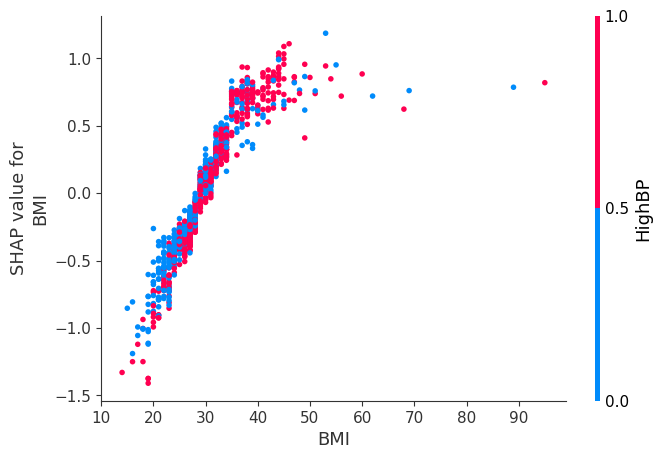

In [ ]:
shap.dependence_plot(ind='BMI', interaction_index='HighBP',
                     shap_values=shap_values,
                     features=X_test)

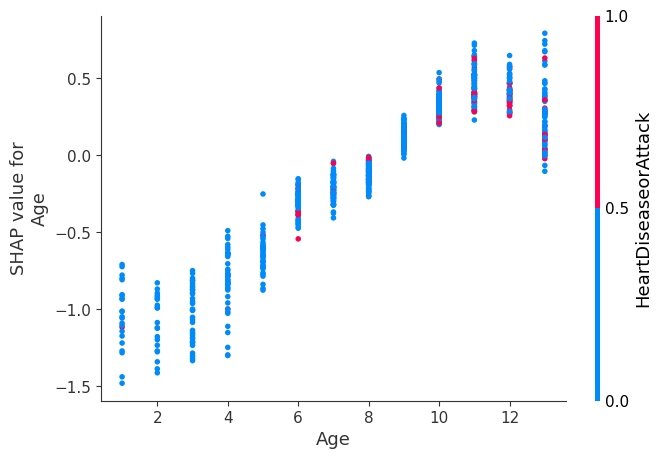

In [ ]:
shap.dependence_plot(ind='Age', interaction_index='HeartDiseaseorAttack',
                     shap_values=shap_values,
                     features=X_test)

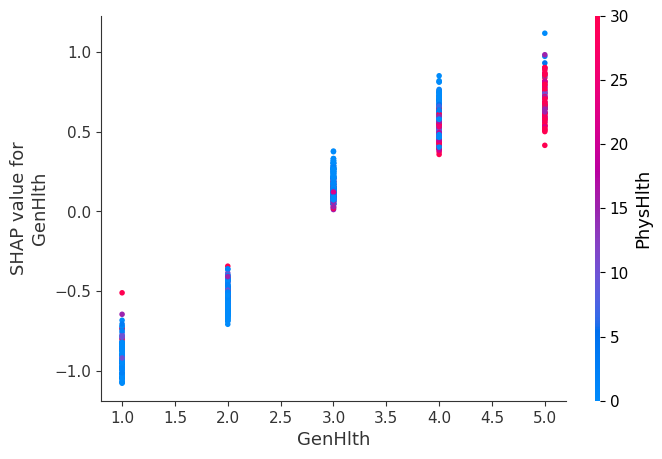

In [ ]:
shap.dependence_plot(ind='GenHlth', interaction_index='PhysHlth',
                     shap_values=shap_values,
                     features=X_test)

## decision_plot

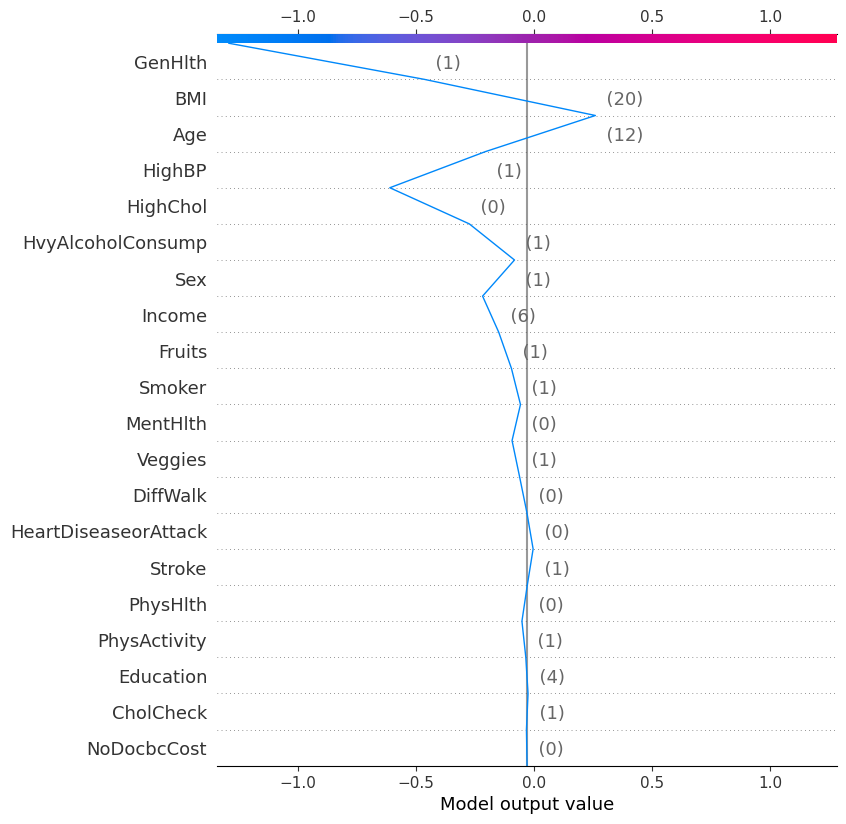

In [ ]:
shap.decision_plot(expected_value,
                shap_values[0,:], X_test.iloc[0,:])

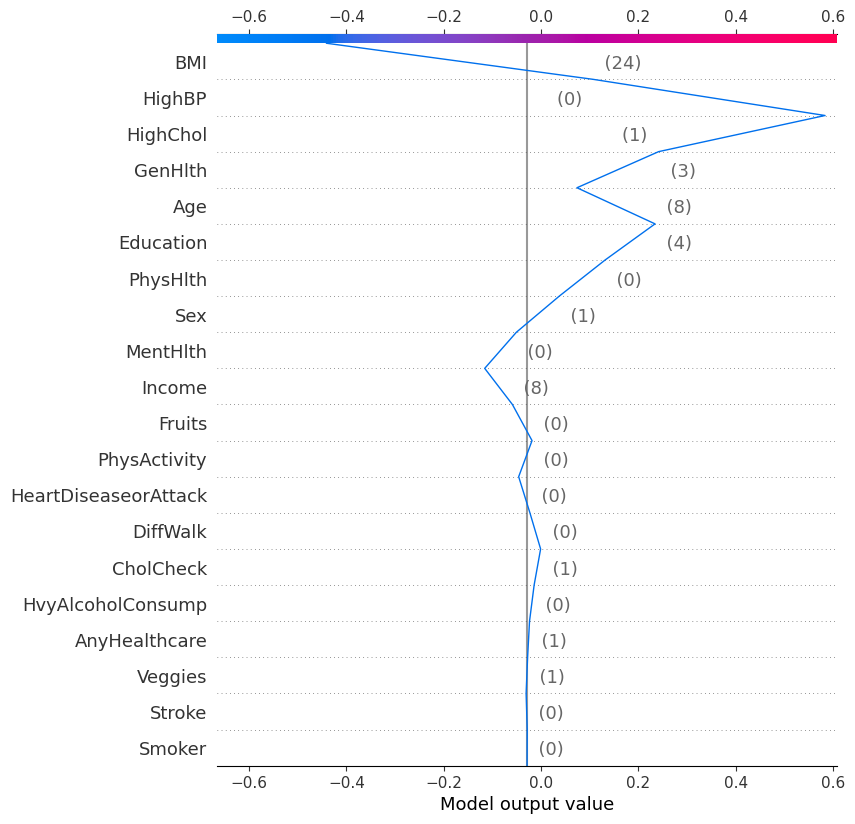

In [ ]:
shap.decision_plot(expected_value,
                shap_values[1,:], X_test.iloc[1,:])

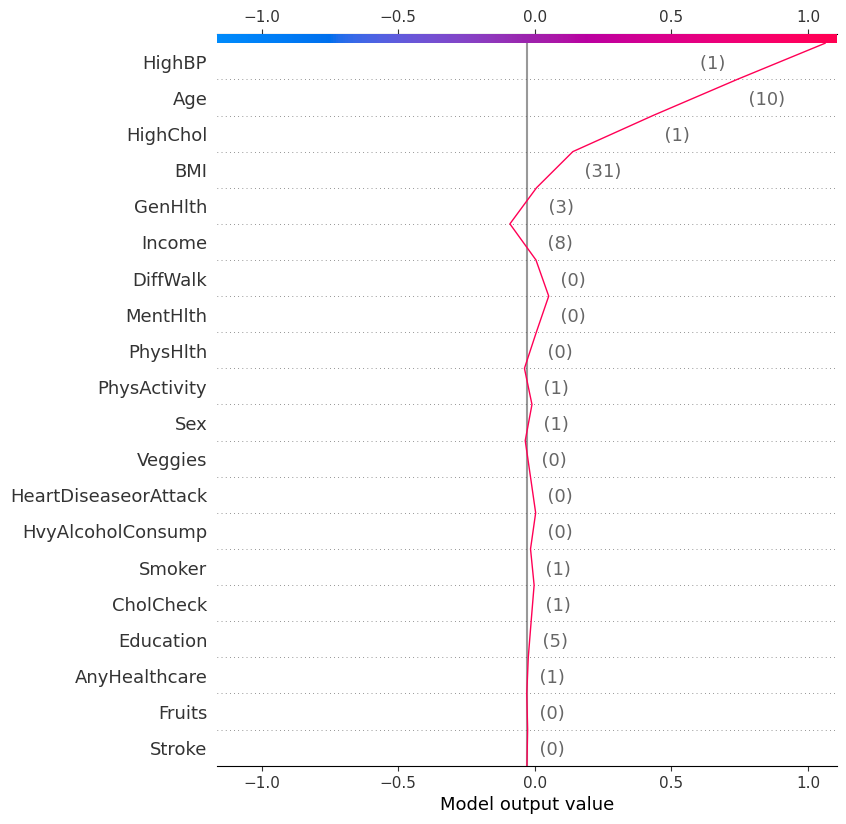

In [ ]:
shap.decision_plot(expected_value,
                shap_values[2,:], X_test.iloc[2,:])

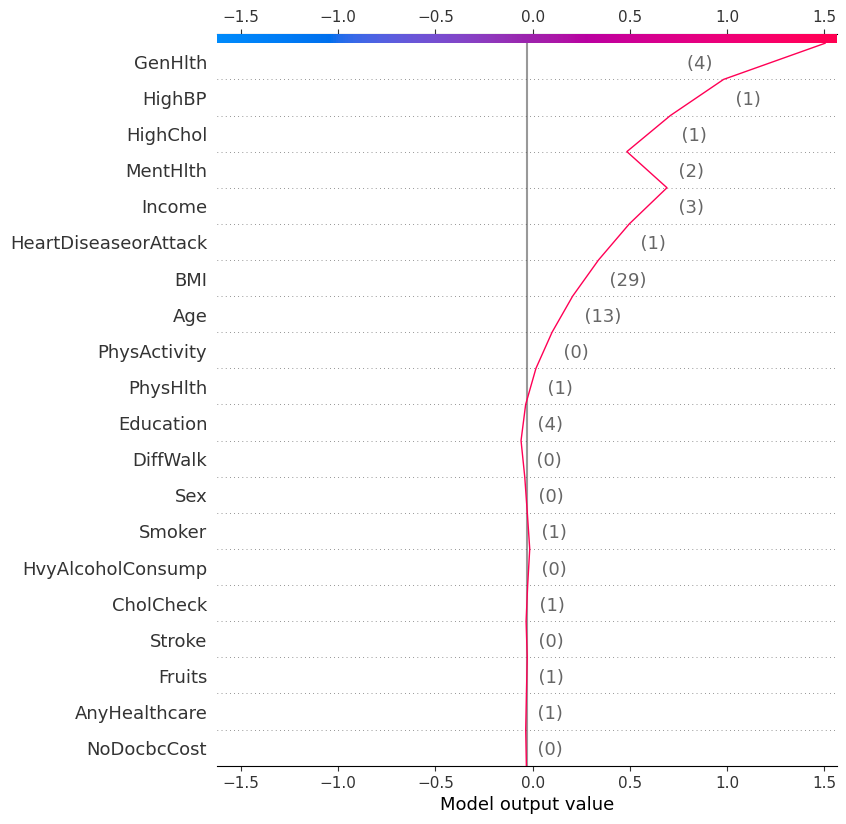

In [ ]:
shap.decision_plot(expected_value,
                shap_values[5,:], X_test.iloc[5,:])

## force_plot

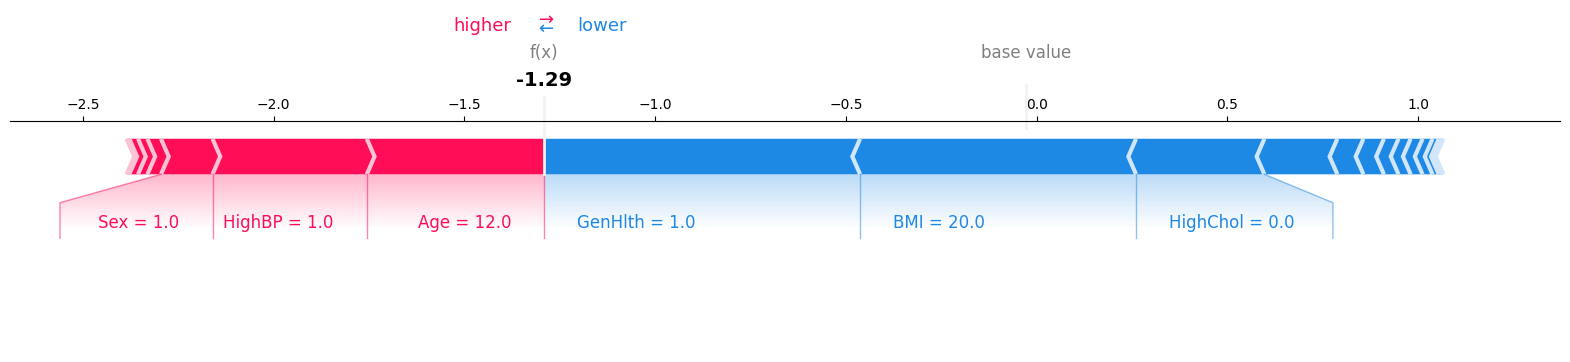

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[0,:], X_test.iloc[0,:], matplotlib=True)

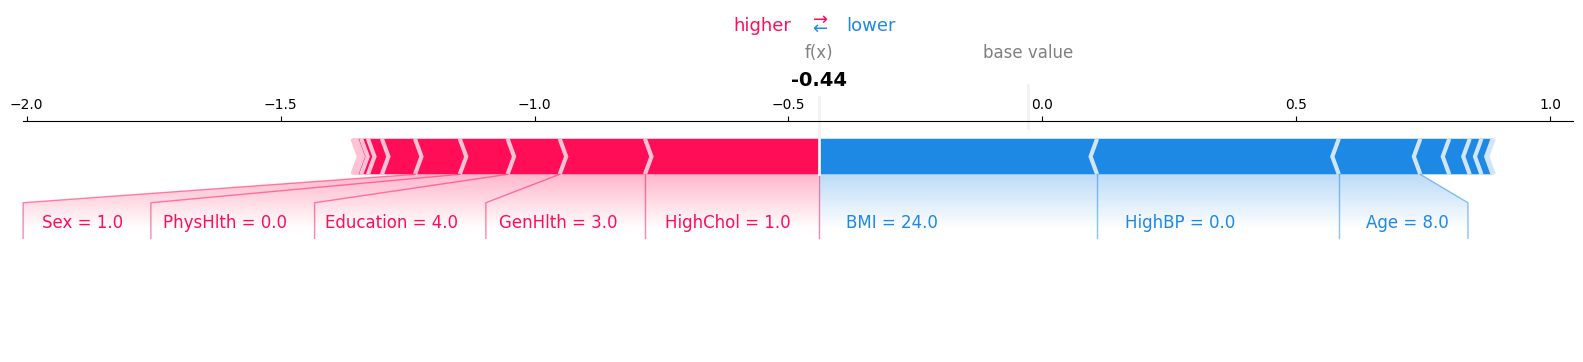

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[1,:], X_test.iloc[1,:], matplotlib=True)

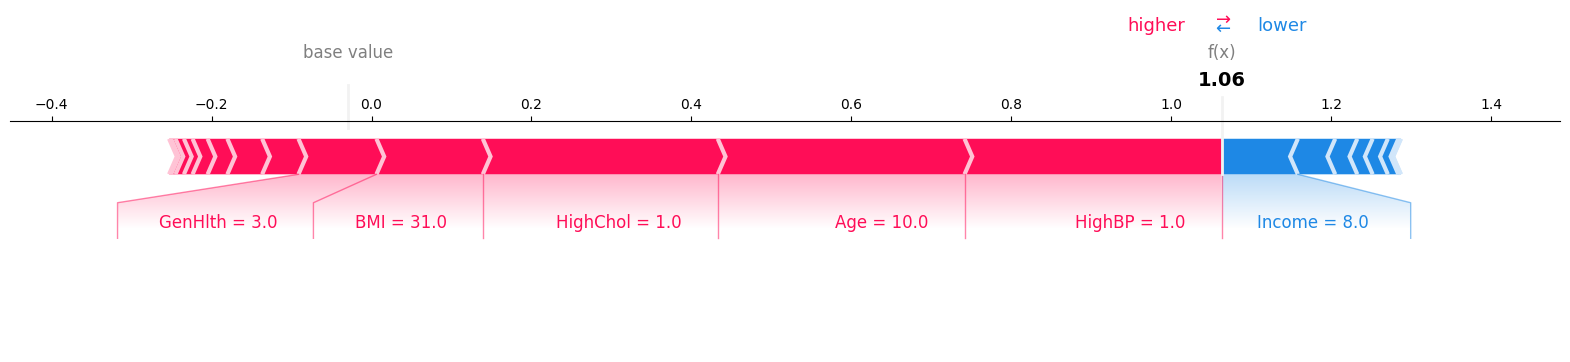

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[2,:], X_test.iloc[2,:], matplotlib=True)

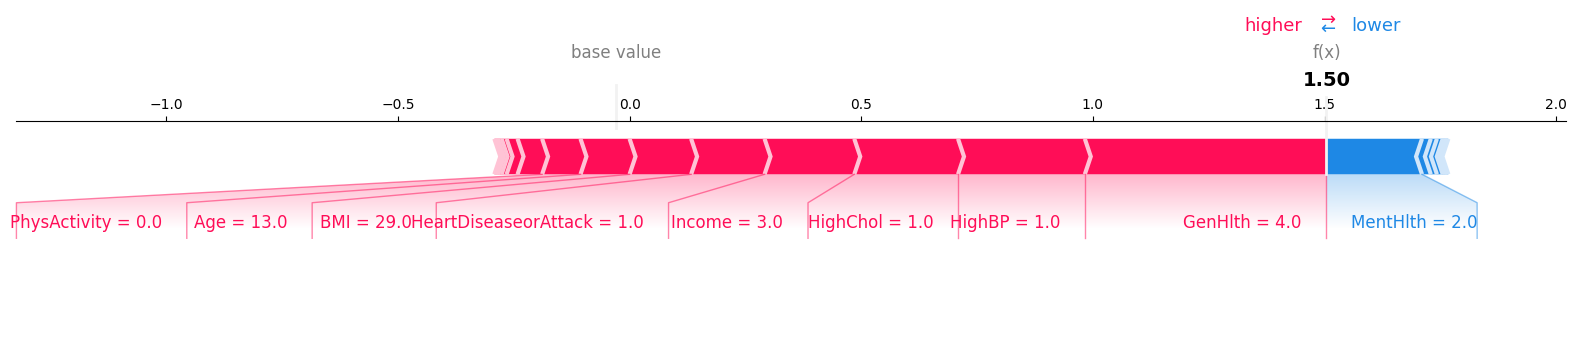

In [ ]:
shap.initjs()
shap.force_plot(expected_value,
                shap_values[5,:], X_test.iloc[5,:], matplotlib=True)

## waterfall_plot

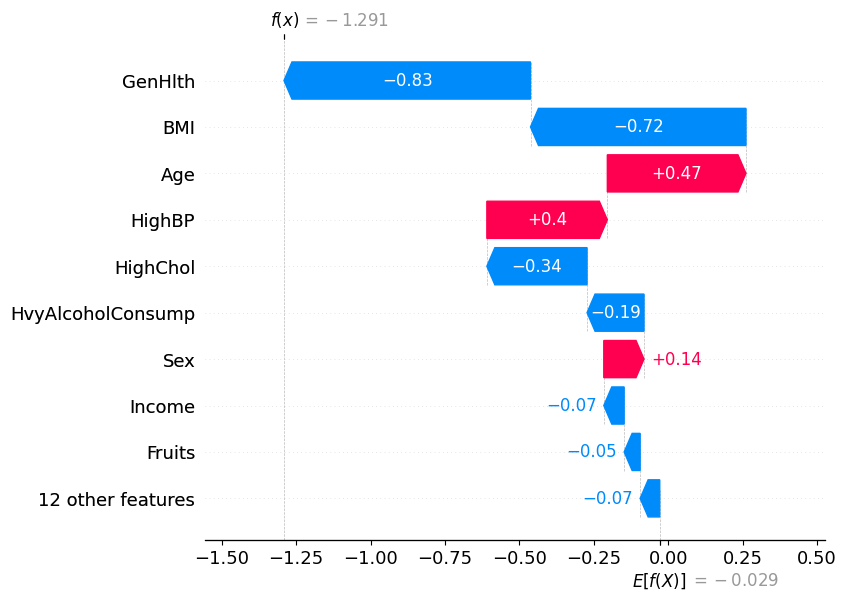

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[0],
                                       feature_names = X_test.columns)

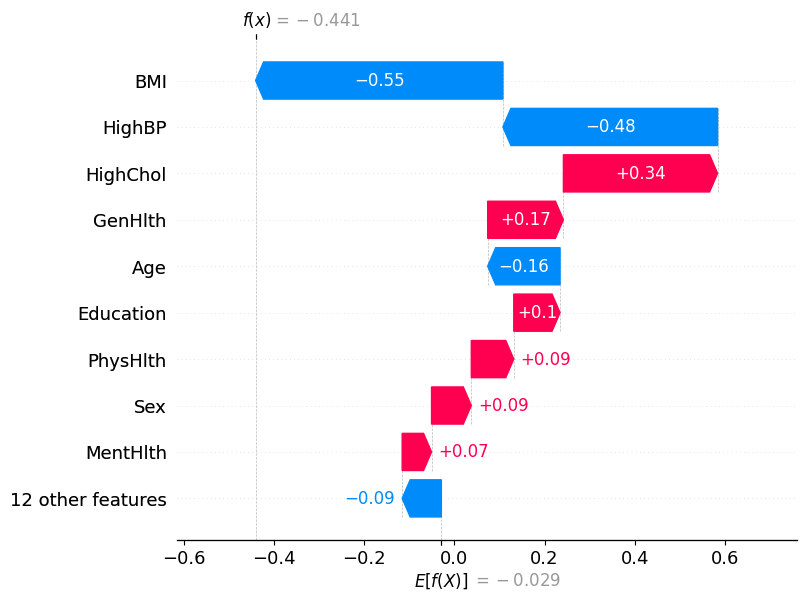

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[1],
                                       feature_names = X_test.columns)

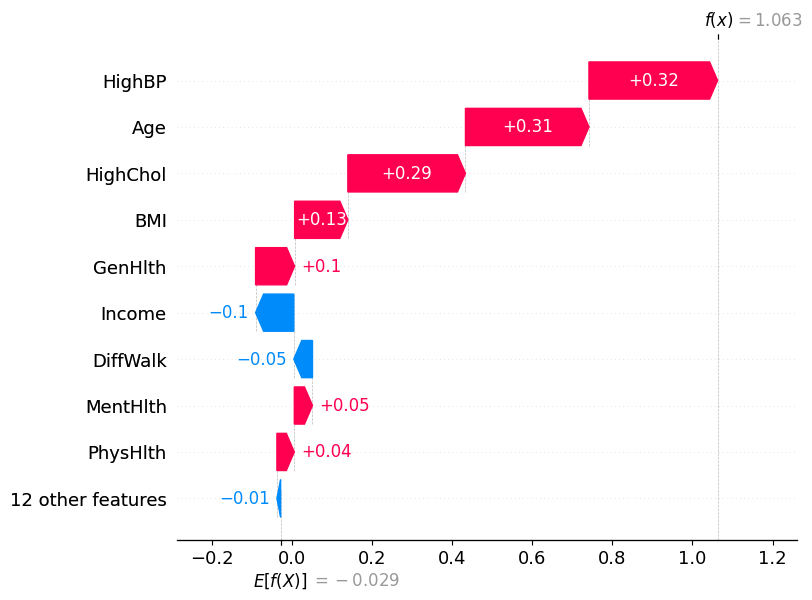

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[2],
                                       feature_names = X_test.columns)

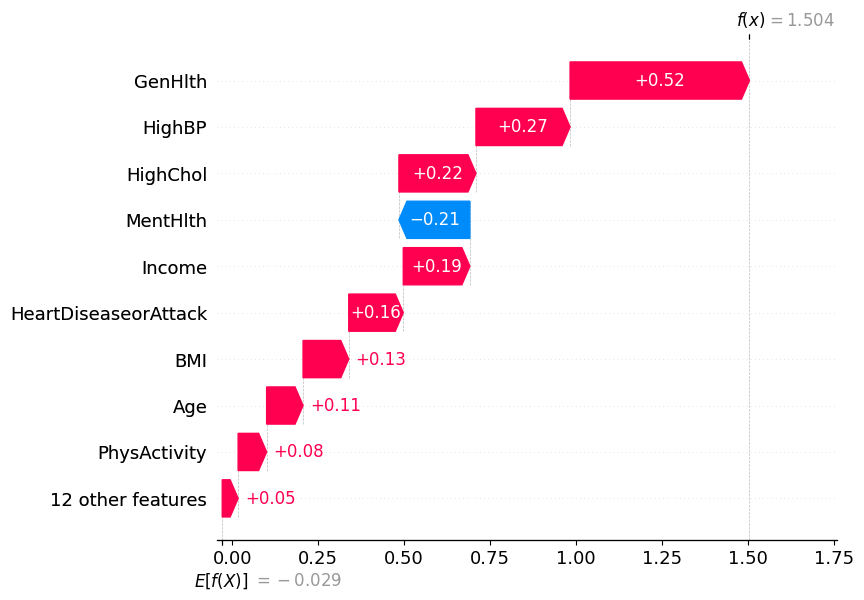

In [ ]:
shap.plots._waterfall.waterfall_legacy(expected_value,
                                       shap_values[5],
                                       feature_names = X_test.columns)